In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
df_train = pd.read_excel("Train_dataset.xlsx")
df_to_predict = pd.read_excel("Test_dataset.xlsx")

In [9]:
df_train.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [12]:
df.shape

(10714, 9)

In [25]:
df = pd.read_csv('./Train_dataset.csv')
df=df.drop(['Name','salary','Region','people_ID','Children','Occupation','Mode_transport','Deaths/1M','comorbidity','cases/1M','cardiological pressure','Diuresis','Platelets','HBB','d-dimer','Heart rate','HDL cholesterol','Insurance','FT/month'], axis = 1)
print(df.shape)
df_train= df.iloc[:,0:7].values
df_train=pd.DataFrame(df_train)
X=df_train
#X = df_train.drop(["Infect_Prob"], axis=1)

y = df.iloc[:,8].values

#y = df_train["Infect_Prob"]
X_to_predict = df_to_predict

#y = df.iloc[:, 8].values
#y=pd.DataFrame(y)
#df_train=pd.get_dummies(df_train)
df_train=pd.DataFrame(df_train)

df1 = pd.read_csv('./Test_dataset.csv') 
df1=df1.drop(['Name','salary','cases/1M','Deaths/1M','Region','people_ID','Children','Occupation','Mode_transport','comorbidity','cardiological pressure','Diuresis','Platelets','HBB','d-dimer','Heart rate','HDL cholesterol','Insurance','FT/month'], axis = 1)
df_to_predict= df1.iloc[:,0:7].values
df_to_predict=pd.DataFrame(df_to_predict)
#df_to_predict=pd.get_dummies(df_to_predict)


y=pd.DataFrame(y)
X_to_predict = df_to_predict

(10714, 9)


In [26]:
print("Number of rows in training dataset",df_train.shape)
print("Number of rows in prediction dataset",df_to_predict.shape)

Number of rows in training dataset (10714, 7)
Number of rows in prediction dataset (14498, 7)


In [27]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df_train[df_train.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape

Total Duplicate Rows except first occurrence based on all columns are :


(248, 7)

In [28]:
#Separate categorical and numerical columns in dataframe
X_categorical = X.select_dtypes(exclude=['int', 'float'])
X_numerical = X.select_dtypes(include=['int', 'float'])

X_to_predict_categorical = X_to_predict.select_dtypes(exclude=['int', 'float'])
X_to_predict_numerical = X_to_predict.select_dtypes(include=['int', 'float'])

In [29]:
# Check if categorical columns are assigned properly
X_categorical.head()

#Create a back up copy specifically for plotting graphs
X_numerical_graph = X_numerical.copy()
X_categorical_graph = X_categorical.copy()

In [30]:
#Check if numerical columns are assigned properly
X_categorical.shape

(10714, 7)

In [31]:
X_numerical.head()

""
0
1
2
3
4


In [32]:
X_categorical.head()

,0,1,2,3,4,5,6
0,Female,Mrs,YES,68,8,<400,27
1,Female,Mrs,YES,64,15,<100,5
2,Female,Mrs,NO,19,13,<300,40
3,Female,Mrs,YES,33,9,<200,27
4,Female,Mrs,NO,23,7,<400,32


In [33]:
#Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_categorical = X_categorical.apply(LabelEncoder().fit_transform)
X_to_predict_categorical = X_to_predict_categorical.apply(LabelEncoder().fit_transform)

In [34]:
#Check values in numerical columns
X_numerical.head()

""
0
1
2
3
4


In [35]:
# Check the skew of all numerical features
from scipy.stats import skew
skewed_feats = X_numerical.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


Skew in numerical features: 

There are 0 skewed numerical features to Box Cox transform


In [36]:
#Check values in numerical columns after minmax scaling
X_numerical.head(5)

""
0
1
2
3
4


In [37]:
#Merge categorical and numerical columns back into respective X and X_to_predict
X = pd.concat([X_categorical, X_numerical], axis=1)
X_to_predict = pd.concat([X_to_predict_categorical, X_to_predict_numerical], axis=1)

In [38]:
#Check shape of all three to verify that merge was done properly in above step
print(X.shape, X_numerical.shape, X_categorical.shape)
print(X_to_predict.shape, X_to_predict_numerical.shape, X_to_predict_categorical.shape)
print(y.shape)

(10714, 7) (10714, 0) (10714, 7)
(14498, 7) (14498, 0) (14498, 7)
(10714, 1)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_log_error
# We have created a function to print accuracy metrics which can be used
# to get accuracy metrics of all models in upcoming steps
def print_accuracy_report(y_test, y_pred,X_test, model):
    print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))

In [40]:
# we have created a function to generate linear regression model
# which can then be called again after feature selection or other steps
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
def LinearRegressionModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor))
    return regressor
linearModel = LinearRegressionModel(X,y)

R Squared(Accuracy) 0.196755721290372
Mean Absolute Error: 5.55371618730351
Mean Squared Error: 87.7600603108277
Root Mean Squared Error: 9.368033961874161
Root Mean Squared Log Error 0.16232497962575032
None


In [41]:
# we have created a function to generate linear regression model
# which can then be called again after feature selection or other steps
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import accuracy_score
def BayesianRidgeModel(X,y):
 X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
 regressor = BayesianRidge()  
 regressor.fit(X_train, y_train)
 y_pred = regressor.predict(X_test)
 print(print_accuracy_report(y_test, y_pred, X_test, regressor))
 return regressor
linearModel = BayesianRidgeModel(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R Squared(Accuracy) 0.19681541874439812
Mean Absolute Error: 5.555630439823277
Mean Squared Error: 87.75353794608186
Root Mean Squared Error: 9.367685837285634
Root Mean Squared Log Error 0.16229534810633658
None


In [42]:
#similarly define a function for random forest regressor
from sklearn.ensemble import RandomForestRegressor
def RandomForestRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
randomForestModel = RandomForestRegressorModel(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R Squared(Accuracy) 0.04632639572311481
Mean Absolute Error: 5.917435876680241
Mean Squared Error: 104.19551716276753
Root Mean Squared Error: 10.207620543631485
Root Mean Squared Log Error 0.1756553725537701
None


In [43]:
# get feature importances from a model
import matplotlib.pyplot as plt
def  descending order
    feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
    # Next plot feature importances to get iplotFeatureImportances(model):
    #first print all features importances indea about where the curve breaks
    # in the graph i.e. select top appropriate features
    features = X.columns.tolist()
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

   importance
3    0.435755
6    0.235451
4    0.185186
5    0.100771
0    0.021354
1    0.020173
2    0.001309


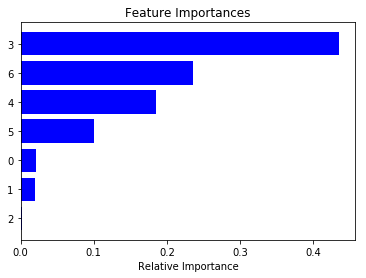

In [44]:
plotFeatureImportances(randomForestModel)

In [45]:
# select features using extratreesclassifier
from sklearn.ensemble import ExtraTreesRegressor
def ExtraTreesRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = ExtraTreesRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
extraTreeRegressorModel = ExtraTreesRegressorModel(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R Squared(Accuracy) -0.05272728480388489
Mean Absolute Error: 6.173355753030534
Mean Squared Error: 115.0178251548316
Root Mean Squared Error: 10.72463636469002
Root Mean Squared Log Error 0.18319584368797648
None
